In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [27]:
df = pd.read_csv("Engineering_graduate_salary Mod.csv")

In [28]:
df.head()

,10percentage,12graduation,12percentage,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,86.0,2007,75.20,2,1,1,76.60,176,0,17,...,-1,-1,-1,-1,-2.5811,0.0328,0.3817,0.4148,-1.0774,35000
1,85.3,2010,85.40,2,1,21,79.39,1038,1,21,...,-1,-1,-1,-1,-3.7496,-5.6151,-3.8324,-0.4879,-7.3757,35000
2,88.0,2007,80.40,2,1,3,87.65,6884,0,25,...,-1,-1,-1,-1,0.2009,0.0328,-0.9245,0.2973,-0.1295,35000
3,64.0,2008,63.33,2,2,25,71.00,8811,1,11,...,-1,-1,-1,-1,1.8517,0.2124,2.1617,-2.0092,-0.2859,40000
4,79.2,2009,89.33,2,1,8,77.00,9099,0,20,...,-1,433,-1,-1,-1.0208,-0.7866,-1.0659,-0.3612,-2.5853,40000


In [29]:
X1 = df.iloc [:, 2:3]
X2 = df.iloc [:, 4:5]
X3 = df.iloc [:, 8]
Y = df.iloc [:, 25]

In [30]:
X1.head()

,12percentage
0,75.20
1,85.40
2,80.40
3,63.33
4,89.33


In [31]:
X2.head()

,Degree
0,1
1,1
2,1
3,2
4,1


In [32]:
X3.head()

0    0
1    1
2    0
3    1
4    0
Name: CollegeCityTier, dtype: int64

In [33]:
Z = pd.merge(X1,X2, left_index = True, right_index = True)
Z.head()

,12percentage,Degree
0,75.20,1
1,85.40,1
2,80.40,1
3,63.33,2
4,89.33,1


In [34]:
Z1 = pd.merge(Z,X3, left_index = True, right_index = True)
Z1.head()

,12percentage,Degree,CollegeCityTier
0,75.20,1,0
1,85.40,1,1
2,80.40,1,0
3,63.33,2,1
4,89.33,1,0


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Z1, Y, train_size = 0.8)

In [36]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [37]:
Z1[0:7]

,12percentage,Degree,CollegeCityTier
0,75.20,1,0
1,85.40,1,1
2,80.40,1,0
3,63.33,2,1
4,89.33,1,0
5,76.00,1,1
6,82.60,1,1


## Logistic Regression

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Z1, Y, train_size = 0.8)

In [39]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [40]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter = 1000)
classifier.fit(X_train, Y_train)
y_prediction = classifier.predict(X_test)
y_prediction[0:5]

ValueError: Unknown label type: 'continuous'

In [41]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, y_prediction)
cnf_matrix

NameError: name 'y_prediction' is not defined

In [42]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, y_prediction))
print("Precision:",metrics.precision_score(Y_test, y_prediction))
print("Recall:",metrics.recall_score(Y_test, y_prediction))

NameError: name 'y_prediction' is not defined

In [43]:
feature_cols = ['12graduation', '12percentage', 'collegeGPA', 'CollegeCityID','GraduationYear']
X = df[feature_cols] # Features
y = df.label # Target variable

AttributeError: 'DataFrame' object has no attribute 'label'

In [44]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,Y_train)

#
y_prediction=logreg.predict(X_test)

ValueError: Unknown label type: 'continuous'

In [45]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y_prediction)
cnf_matrix

NameError: name 'y_prediction' is not defined

In [46]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

NameError: name 'cnf_matrix' is not defined

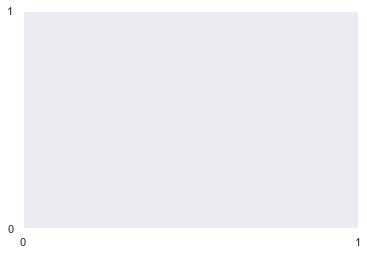

In [47]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [48]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_prediction))
print("Precision:",metrics.precision_score(Y_test, y_prediction))
print("Recall:",metrics.recall_score(Y_test, y_prediction))

NameError: name 'y_prediction' is not defined

In [49]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AttributeError: 'LogisticRegression' object has no attribute 'classes_'